In [ ]:
import zipfile
import os

# Spécifiez le chemin du fichier ZIP
zip_path = '/content/drive/MyDrive/dataset/dataset_cv.zip'  # Remplacez avec le chemin correct

# Créez un dossier pour l'extraction
extract_path = '/content/drive/MyDrive/dataset'
os.makedirs(extract_path, exist_ok=True)

# Extraction
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print("Extraction terminée!")


Extraction terminée!


In [ ]:
import os
import shutil
import zipfile

# Define paths
extracted_dir = '/content/drive/MyDrive/dataset/train_petimages/train_petimages'  # Directory where the ZIP will be extracted
cat_dir = os.path.join(extracted_dir, 'cats')
dog_dir = os.path.join(extracted_dir, 'dogs')


# Step 2: Create 'cats' and 'dogs' directories if they don't exist
os.makedirs(cat_dir, exist_ok=True)
os.makedirs(dog_dir, exist_ok=True)

# Step 3: Move files into respective directories based on their names
for filename in os.listdir(extracted_dir):
    file_path = os.path.join(extracted_dir, filename)
    if os.path.isfile(file_path):  # Ignore directories or invalid files
        if filename.lower().startswith("cat"):
            shutil.move(file_path, cat_dir)
        elif filename.lower().startswith("dog"):
            shutil.move(file_path, dog_dir)

# Step 4: Verify the organization
print(f"Cat images: {len(os.listdir(cat_dir))}")
print(f"Dog images: {len(os.listdir(dog_dir))}")


Cat images: 10000
Dog images: 10000


In [ ]:
import os
from PIL import Image
import shutil

def is_valid_image(file_path):
    try:
        img = Image.open(file_path)
        img.verify()
        return True
    except:
        return False

def clean_image_directory(extracted_dir):
    # List for storing corrupted files
    corrupted_files = []

    # Check all subdirectories
    for root, dirs, files in os.walk(extracted_dir):
        for filename in files:
            file_path = os.path.join(root, filename)
            if not is_valid_image(file_path):
                corrupted_files.append(file_path)
                os.remove(file_path)
                print(f"Removed corrupted file: {file_path}")

    return corrupted_files

# Clean the directory
corrupted_files = clean_image_directory('/content/drive/MyDrive/dataset/train_petimages/train_petimages')
print(f"\nTotal corrupted files removed: {len(corrupted_files)}")


Removed corrupted file: /content/drive/MyDrive/dataset/train_petimages/train_petimages/cats/cat_22952.jpg
Removed corrupted file: /content/drive/MyDrive/dataset/train_petimages/train_petimages/dogs/dog_21597.jpg

Total corrupted files removed: 2


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define paths
train_dir = '/content/drive/MyDrive/dataset/train_petimages/train_petimages'  # Path to the directory containing 'cats' and 'dogs'

# Define ImageDataGenerator with basic preprocessing and augmentation
train_datagen = ImageDataGenerator(
    rescale=1.0 / 255,         # Normalize pixel values
    shear_range=0.2,          # Augmentation
    zoom_range=0.2,           # Augmentation
    horizontal_flip=True,     # Augmentation
    validation_split=0.2      # Split for validation
)

# Create data loaders
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),   # Resize images to 150x150
    batch_size=32,
    class_mode='binary',      # Binary classification
    subset='training'         # Use the training subset
)

validation_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),   # Resize images to 150x150
    batch_size=32,
    class_mode='binary',      # Binary classification
    subset='validation'       # Use the validation subset
)


Found 16000 images belonging to 2 classes.
Found 3998 images belonging to 2 classes.


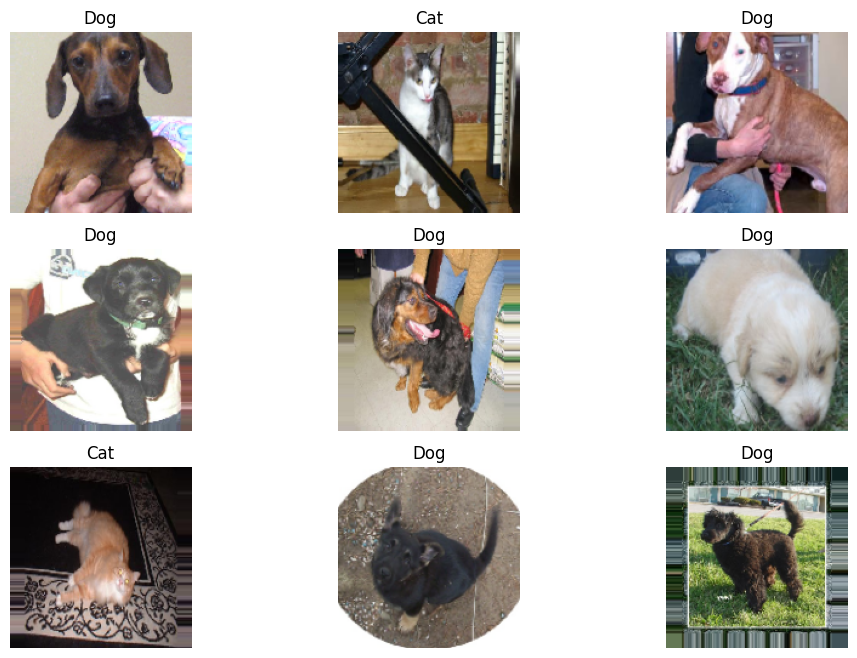

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Get a batch of images and labels
images, labels = next(train_generator)  # Get one batch of images

# Display the images with labels
plt.figure(figsize=(12, 8))
for i in range(9):  # Display 9 images in a 3x3 grid
    plt.subplot(3, 3, i + 1)
    plt.imshow(images[i])
    plt.title("Dog" if labels[i] == 1 else "Cat")
    plt.axis("off")

plt.show()


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Simple CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# Train the model
history = model.fit(
    train_generator,
    validation_data=validation_generator,
    validation_steps=10,
    epochs=25
)


Epoch 1/25


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


500/500 ━━━━━━━━━━━━━━━━━━━━ 1558s 3s/step - accuracy: 0.5370 - loss: 0.7516 - val_accuracy: 0.6187 - val_loss: 0.6543
Epoch 2/25
 21/500 ━━━━━━━━━━━━━━━━━━━━ 19:40 2s/step - accuracy: 0.6184 - loss: 0.6426

KeyboardInterrupt: 